# Morgan's Exploratory File

## Read Data Files

First, I imported the pandas library in preparation of exploring each csv/tsv file available

In [1]:
import pandas as pd

### Movie Gross

In [2]:
movie_gross = pd.read_csv("data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The movie_gross dataframe contains title, studios, domestic gross revenue, foreign gross revenue, and the year of release.

### Movie Info

In [3]:
movie_info = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This dataframe contains information on genres and directors, which I think may potentially be useful predictors of profit. However, it lacks movie titles, which will make it difficult to merge/join with other datasets to gain more useful insight. 

### Reviews

In [4]:
reviews = pd.read_csv("data/rt.reviews.tsv", encoding='latin-1', sep='\t')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This dataframe contains reviews and ratings, which could be useful if there were also movie titles or some other indicator of which movie is being referenced other than the ID number. 

###  TMDB

In [5]:
tmdb = pd.read_csv("data/tmdb.movies.csv", index_col = 0)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This dataset also has genres listed as ID numbers (much like the Movie Info dataframe). As an added benefit, Landon was able to help me locate a data dictionary for me to replace these integers with their associated genre. However, this dataframe has the advantage of having the title and popularity ranking included in the rows, which the Movie Info dataframe lacked. 

### Movie Budgets

In [6]:
budgets = pd.read_csv("data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Finally, the budgets dataframe contains information on the production budget and worldwide gross revenue. This dataframe is useful for calculating total profit. 

### Initial Curiosities

Based off my first glance at these datasets, I decided to first explore if there is any correlation between genre and profit. Because they share information about movie titles, I decide to utilize both the budgets dataframe as well as the TMDB dataframe.

## Initial Data Cleaning

I decided that the first order of business would be to calculate my measurement of benefit (in this scenario, profit). To do so, I needed to subtract production cost from worldwide revenue. However, these columns weren't ready for me to perform calculations on yet because they were not the correct data type.

I could tell from my initial glance at the budgets dataframe that there were string characters (such as $) in the cells. To confirm which characters I needed to remove before casting this column as an integer, I took a brief look at the first few values. 

In [7]:
budgets['worldwide_gross'].head() # finding strings to remove

0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object

Thus, it is clear that I need to remove $ and , from the values before casting them as integers. 

In [8]:
# removing $ and , from gross revenue
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(",","")
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","")

# casting the values as integers
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

I could also tell that the production_budget column shares these same characters. So, I performed the same operations on this column as well. 

In [9]:
# removing $ and , from production budget
budgets['production_budget'] = budgets['production_budget'].str.replace(",","")
budgets['production_budget'] = budgets['production_budget'].str.replace("$","")

# casting the values as integers
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])

Now that these values were cast as integers, I could create a new column in the dataframe to represent total profit.
Note: I used worldwide gross rather than domestic gross as it appeared to be a more holistic representation of the overall revenue than domestic gross. Because I did not use the domestic gross column in my calculation, I did not dedicate time to cleaning this column. 

In [10]:
# calculating total profit
budgets['total_profit'] =  budgets['worldwide_gross'] - budgets['production_budget']

# confirmation
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


## Merging budget and TMDB databases

With this new column created, I began to tackle how I might combine this dataframe with the TMDB dataframe so that I could merge the available information on genres with the available information on profit for the associated movie. 

To do so, I first ensured that the movie titles were the indeces for each of these dataframes. 

In [11]:
budgets.set_index('movie')
tmdb.set_index('title')

,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
Inception,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...,...,...
Laboratory Conditions,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,0.0,1
_EXHIBIT_84xxx_,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
The Last One,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,0.0,1


Once these indeces were set, I joined these dataframes using an inner join. I used an inner join because I currently have no use for movies that appear in one dataframe and not the other. However, I made sure to save this joined dataframe as a separate dataframe, thus preserving the initial dataframes in case I need to refer back to them later. I also set suffixes in case of repeated column names. After merging, I used the .info() method to confirm that I have populated the table adequately.

In [12]:
budgets_and_tmdb = budgets.join(tmdb, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_and_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_budgets            5782 non-null   int64  
 1   release_date_budgets  5782 non-null   object 
 2   movie                 5782 non-null   object 
 3   production_budget     5782 non-null   int64  
 4   domestic_gross        5782 non-null   object 
 5   worldwide_gross       5782 non-null   int64  
 6   total_profit          5782 non-null   int64  
 7   genre_ids             5782 non-null   object 
 8   id_tmdb               5782 non-null   int64  
 9   original_language     5782 non-null   object 
 10  original_title        5782 non-null   object 
 11  popularity            5782 non-null   float64
 12  release_date_tmdb     5782 non-null   object 
 13  title                 5782 non-null   object 
 14  vote_average          5782 non-null   float64
 15  vote_count           

I noticed afterwards that the number of valid rows in each column matched perfectly with the total number of rows in the smaller dataframe (budget). This implied to me that I was able to gather genre information about every movie for which I had profit information. 

I also noticed from this output that my genre_ids column, which I had previously thought contained lists of integers based on what was observed in the first few rows of this dataframe, is actually just strings. In order to create a frequency distribution of the genres, I needed to accomplish the following:

1. Remove brackets and whitespace
2. Replace each genre id with the associated genre
3. Create a new dataframe with genres as columns and cells containing binary values
    0 -> the movie represented in this row is NOT this genre
    1 -> the movie represented in this row IS this genre

In [13]:
# Initialize a dictionary to be transformed into a dataframe
genre_dictionary = {"Title" : [],
                    "Action" : [],
                   "Adventure" : [],
                   "Animation" : [],
                   "Comedy" : [],
                   "Crime" : [],
                   "Documentary" : [],
                   "Drama" : [],
                   "Family" : [],
                   "Fantasy" : [],
                   "History" : [],
                   "Horror" : [],
                   "Music" : [],
                   "Mystery" : [],
                   "Romance" : [],
                   "SciFi" : [],
                   "TV" : [],
                   "Thriller" : [],
                   "War" : [],
                   "Western" : []}

# for each row
for index, lst in budgets_and_tmdb.iterrows():
    
    # remove the brackets from the genre_ids column
    no_chars = lst['genre_ids'].strip('[').strip(']')
    
    # replace each genre id with the associated genre and remove white space
    no_chars_nor_nums = no_chars.replace("28" ,"Action").replace("12","Adventure").replace("16","Animation").replace("35","Comedy").replace("80","Crime").replace("99","Documentary").replace("18","Drama").replace("10751","Family").replace("14","Fantasy").replace("36","History").replace("27","Horror").replace("10402","Music").replace("9648","Mystery").replace("10749", "Romance").replace("878", "SciFi").replace("10770","TV").replace("53","Thriller").replace("10752", "War").replace("37", "Western").replace(" ","")
    
    # For each key in the genre dictionary    
    for key in genre_dictionary.keys():
        
        # if it's the title, append the title
        if key == "Title":
            genre_dictionary['Title'].append(lst['movie'])
            
        #if it's not the title key, then it's a genre key
        
        # if the key is in the list of genres for that movie, append 1
        elif key in no_chars_nor_nums.split(","):
            genre_dictionary[key].append(1)
            
        # else, append 0
        else:
            genre_dictionary[key].append(0)

bin_genre_df = pd.DataFrame(genre_dictionary)
bin_genre_df.head()


,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
0,Avatar,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: On Stranger Tides,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,Dark Phoenix,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Avengers: Age of Ultron,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Star Wars Ep. VIII: The Last Jedi,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Next, I needed to find the sum by genre column in order to visualize the distribution of genres.

In [25]:
genre_sums = {}
for col in bin_genre_df.columns:
    if col != "Title":
        genre_sums[col] = bin_genre_df[col].value_counts()[1]
genre_sums

{'Action': 706,
 'Adventure': 323,
 'Animation': 336,
 'Comedy': 1394,
 'Crime': 353,
 'Documentary': 958,
 'Drama': 1905,
 'Family': 422,
 'Fantasy': 264,
 'History': 127,
 'Horror': 723,
 'Music': 312,
 'Mystery': 274,
 'Romance': 611,
 'SciFi': 358,
 'TV': 155,
 'Thriller': 944,
 'War': 72,
 'Western': 44}

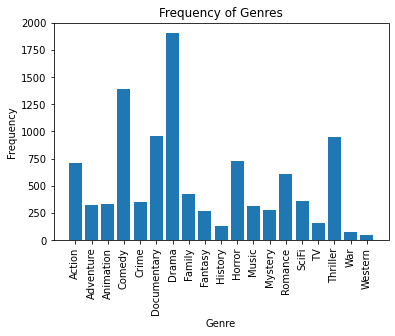

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.bar(x = list(genre_sums.keys()), height = list(genre_sums.values()))
plt.xticks(rotation = 90)
ax.set_title("Frequency of Genres")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency");

It is clear that the most common genre is Drama. Thus, my question is: Is the most popular genre (Drama) significantly more profitable than all other genres?

My plan of action is:
1. Visualize the distributions of profits for all movies other than dramas vs. dramas
2. Calculate the average profit for all movies of all genres other than drama
3. Calculate the average profit for all dramas 
4. Perform a two-sample t-test to see if the average profit for dramas is significantly larger than the average profit for all other genres. 

In [41]:
# set index
bin_genre_df.set_index("Title")

# merge budgets and imdb table with new dummy cols
budgets_tmdb_dummys = budgets.join(bin_genre_df, how='inner', lsuffix = '_budgets' , rsuffix = '_tmdb')
budgets_tmdb_dummys.head()

#drop irrelevant cols
cols_to_remove = ["id","release_date","production_budget","domestic_gross","worldwide_gross","movie"]
cols = [col for col in budgets_tmdb_dummys.columns if col not in cols_to_remove]
budgets_tmdb_dummys = budgets_tmdb_dummys[cols]
budgets_tmdb_dummys.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
0,2351345279,Avatar,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,635063875,Pirates of the Caribbean: On Stranger Tides,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-200237650,Dark Phoenix,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1072413963,Avengers: Age of Ultron,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,999721747,Star Wars Ep. VIII: The Last Jedi,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In order to visualize the histogram of profit for all movies for which the Drama column = 1, I need to first isolate these movies

In [42]:
dramas = budgets_tmdb_dummys.loc[ budgets_tmdb_dummys['Drama'] == 1 ]
dramas.head()

,total_profit,Title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
15,636860230,Spider-Man 3,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
18,767003568,The Hobbit: An Unexpected Journey,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19,685213767,Harry Potter and the Half-Blood Prince,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
20,710366855,The Hobbit: The Desolation of Smaug,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
23,142085065,Superman Returns,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


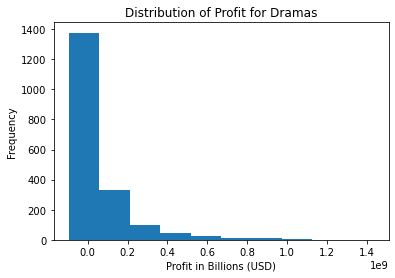

In [50]:
fig, ax = plt.subplots()
ax.hist(dramas['total_profit'])
ax.set_title("Distribution of Profit for Dramas")
ax.set_xlabel("Profit in Billions (USD)")
ax.set_ylabel("Frequency");

In [ ]:
# increased budget -> increased profit?
# if so, hb within dramas?